In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

In [3]:
df = pd.read_csv('hotels.csv')
df.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [5]:
df.shape

(386803, 17)

In [6]:
df['hotel_name'].nunique() # Количество уникальных названий 

1492

In [7]:
df['review_date'] = pd.to_datetime(df['review_date'])
print(f'Самый первый отзыв был оставлен в {df['review_date'].min()}')
print(f'Самый свежий отзыв был оставлен в {df['review_date'].max()}')

Самый первый отзыв был оставлен в 2015-08-04 00:00:00
Самый свежий отзыв был оставлен в 2017-08-03 00:00:00


# 1. Первичная обработка данных (пропущенные значения, выбросы, дубликаты).

In [ ]:
# Посмотрим на дубликаты
df.duplicated().sum()

307

In [ ]:
# Удаляем дубликаты
df.drop_duplicates()

In [ ]:
df.info() 
# Пропущенные значения есть только в столбцах lat и lng, на данный момент мы их оставляем, далее в их заполним.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

c:\Users\user\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\user\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


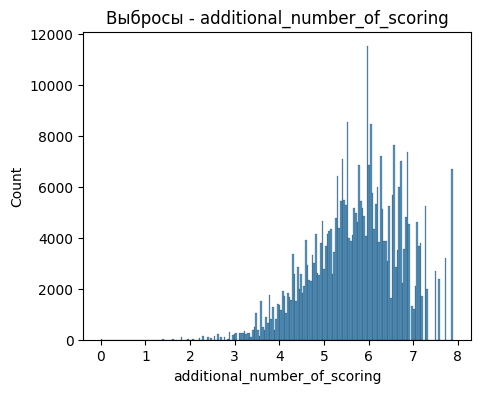

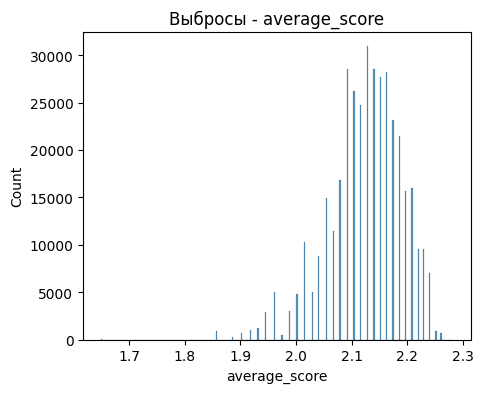

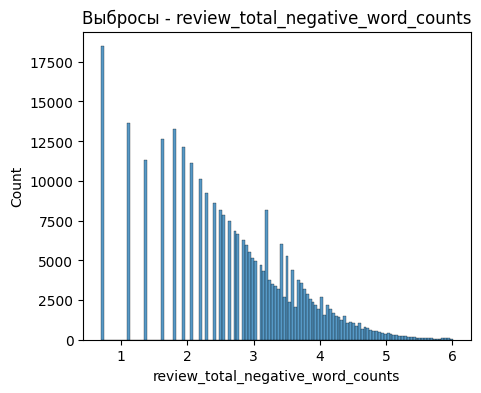

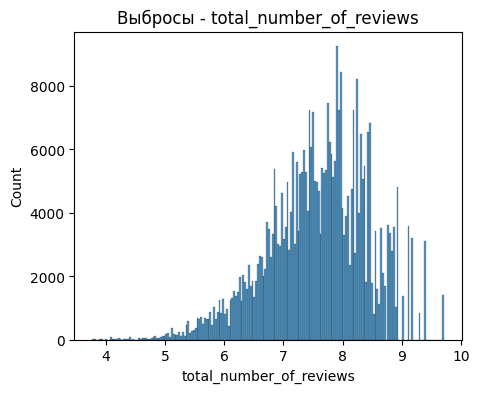

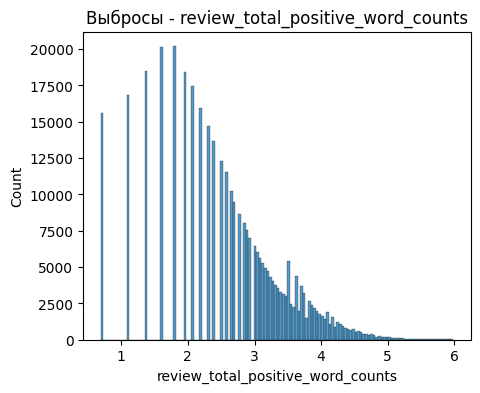

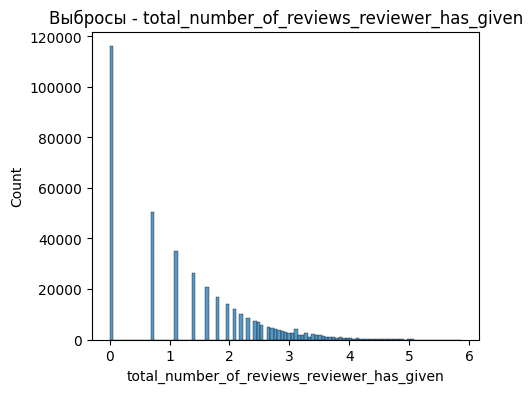

In [30]:
# Проверим выбросы
lst = ['additional_number_of_scoring', 'average_score', 'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given']

for i in lst:
    plt.figure(figsize=(5, 4))
    sns.histplot(np.log(df[i]))
    plt.title(f'Выбросы - {i}')

In [24]:

def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quantile_1, quantile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quantile_3 - quantile_1
    lower_bound = quantile_1 - (iqr * left)
    upper_bound = quantile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [27]:
outliers, cleaned = outliers_iqr_mod(df, 'additional_number_of_scoring', right=3)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 9888
Результирующее число записей: 376915


# 1. Первичная обработка данных

**1. Получим информацию о стране с помощью столбца hotel_address**

In [1681]:
print(f'Количество уникальных адресов: {df['hotel_address'].nunique()}')

Количество уникальных адресов: 1493


In [1682]:
# Напишем функцию, которая возвращает последние 2 слова
def country_return(x):
    lst = x.split()
    last_3_words = ' '.join(lst[-2:])
    return last_3_words

# Используем функцию для создания нового столбца
df['hotels_country'] = df['hotel_address'].apply(country_return)
print(f'Уникальные значения: {df['hotels_country'].unique()}')
print()
print('Процентное соотношение стран в датафрейме:')
df['hotels_country'].value_counts(True)

Уникальные значения: ['United Kingdom' 'Paris France' 'Amsterdam Netherlands' 'Milan Italy'
 'Vienna Austria' 'Barcelona Spain']

Процентное соотношение стран в датафрейме:


hotels_country
United Kingdom           0.508719
Barcelona Spain          0.116680
Paris France             0.115899
Amsterdam Netherlands    0.111183
Vienna Austria           0.075434
Milan Italy              0.072086
Name: proportion, dtype: float64

Влияет ли страна на средний балл отеля?

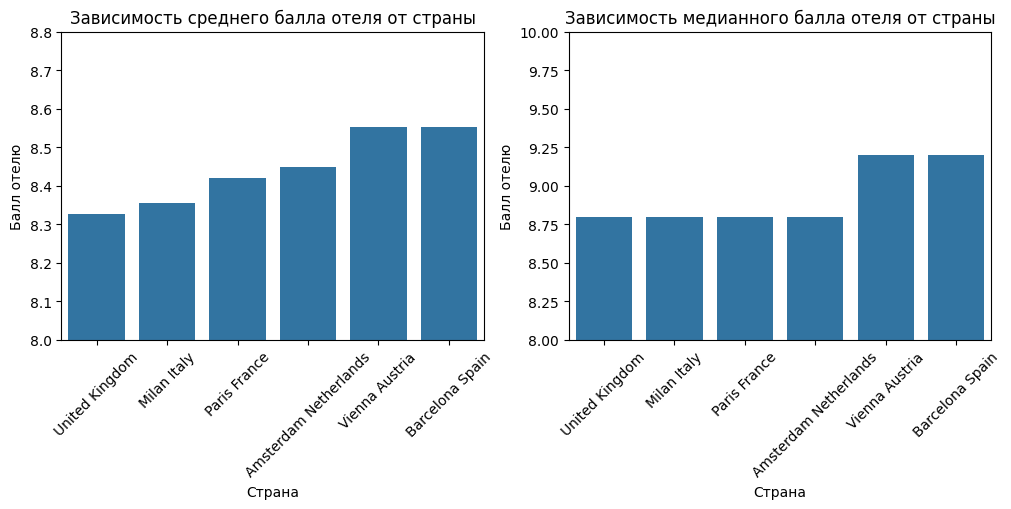

In [1683]:
# Посмотрим на график  среднего и медианного значения оценки отеля в зависимости от страны
country_data_median = df.groupby('hotels_country')['reviewer_score'].median()
country_data_mean = df.groupby('hotels_country')['reviewer_score'].mean()
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 1 график
barplot_mean = sns.barplot(country_data_mean.sort_values(), ax=axes[0])
barplot_mean.set_title('Зависимость среднего балла отеля от страны')
barplot_mean.set_xticklabels(barplot_mean.get_xticklabels(), rotation=45)
barplot_mean.set_xlabel('Страна')
barplot_mean.set_ylabel('Балл отелю');
barplot_mean.set_ylim(8, 8.8)

# 2 график
barplot_median = sns.barplot(country_data_median.sort_values(), ax=axes[1])
barplot_median.set_title('Зависимость медианного балла отеля от страны')
barplot_median.set_xticklabels(barplot_mean.get_xticklabels(), rotation=45)
barplot_median.set_xlabel('Страна')
barplot_median.set_ylabel('Балл отелю')
barplot_median.set_ylim(8, 10);

Влияние страны расположения отеля как на средний, так и на медианный балл существует, поэтому данный признак может помочь для описания целевой переменной.
Однако стоит проверить это статистически.

In [1684]:
# Делим данные на 6 групп
# Создаём удобный словарь
keys = df['hotels_country'].unique()
values = [df[df['hotels_country'] == i]['reviewer_score'].values for i in keys]
dict_countries = dict(zip(keys, values))

# Проверим количество наблюдений в группах. 
# Если их больше 5000, то тест Шапиро-Уилка проводить не стоит, так как он приведёт к отклонениям от действительного результата
for key, value in dict_countries.items():
    print(f'Размер выборки для {key} составляет: {len(value)}')


Размер выборки для United Kingdom составляет: 196774
Размер выборки для Paris France составляет: 44830
Размер выборки для Amsterdam Netherlands составляет: 43006
Размер выборки для Milan Italy составляет: 27883
Размер выборки для Vienna Austria составляет: 29178
Размер выборки для Barcelona Spain составляет: 45132


Проверим альтернативными методами нормальность распределения:
* Гистограмма
* График qq-plot

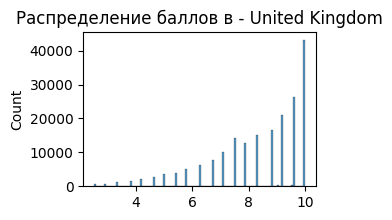

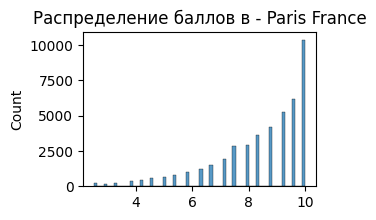

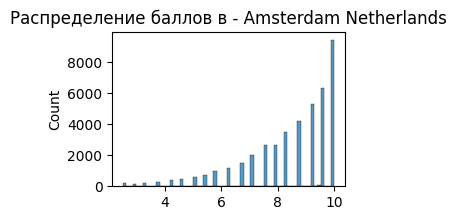

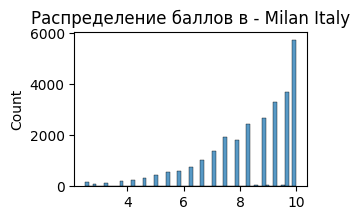

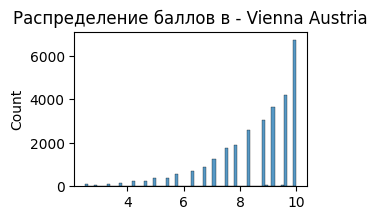

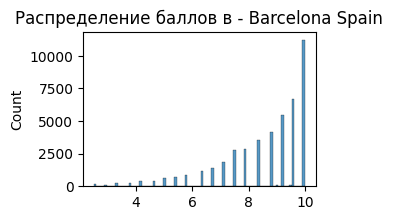

In [1685]:
for key, value in dict_countries.items():
    plt.figure(figsize=(3, 2))
    sns.histplot(value)
    plt.title(f'Распределение баллов в - {key}')

Даже без графика qq-plot очевидно, что данные точно не нормальные, поэтому для определения связи между целевой переменной и страной будем использовать тест Краскела-Уоллиса.

In [1686]:
alpha = 0.05 # Уровень доверительной вероятности

_, p = stats.kruskal(*dict_countries.values())

if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.')
else:
    print(f'P-value = {p:.3f}. Нет оснований отклонить нулевую гипотезу. Статистически значимых отличий между выборками нет.')

P-value = 0.000. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.


Тест Краскела-Уоллиса с вероятностью 0.95 утверждает, что между выборками существует отличие. Визуализация среднего и медианы также доказывает, что страна влияет на оценку отеля, поэтому данный признак можно использовать для дальнейшего анализа. Столбец hotel_address удалим, так как в нём больше нет полезной информации.

In [1687]:
df.drop(['hotel_address'], axis=1, inplace=True)

**2. Обработаем столбец hotel_name**

In [1688]:
print(f'Количество уникальных значений: {df['hotel_name'].nunique()}')
df['hotel_name'].value_counts(True) * 100

Количество уникальных значений: 1492


hotel_name
Britannia International Hotel Canary Wharf           0.927345
Strand Palace Hotel                                  0.828846
Park Plaza Westminster Bridge London                 0.800149
Copthorne Tara Hotel London Kensington               0.694927
DoubleTree by Hilton Hotel London Tower of London    0.615042
                                                       ...   
Ibis Styles Milano Palmanova                         0.001810
Renaissance Paris Republique Hotel Spa               0.001810
Hotel Wagner                                         0.001551
Hotel Gallitzinberg                                  0.001551
Mercure Paris Porte d Orleans                        0.001293
Name: proportion, Length: 1492, dtype: float64

In [1689]:
df.drop(['hotel_name'], axis=1, inplace=True)

Уникальных значений в данном столбце очень много, каких-либо отелей сильно выделяющихся на фоне остальных нет, поэтому удаляем признак, как неинформативный.

**3. Посмотрим на признак reviewer_nationality**

In [1690]:
print(f'Количество уникальных значений : {df['reviewer_nationality'].nunique()}')

Количество уникальных значений : 225


In [1691]:
value_counts_data = df['reviewer_nationality'].value_counts(True) * 100
value_counts_data.head(20)

reviewer_nationality
United Kingdom               47.577966
United States of America      6.861632
Australia                     4.198261
Ireland                       2.876400
United Arab Emirates          1.969219
Saudi Arabia                  1.737836
Netherlands                   1.708363
Switzerland                   1.679925
Canada                        1.547041
Germany                       1.539802
France                        1.433029
Israel                        1.271448
Italy                         1.179412
Belgium                       1.170880
Turkey                        1.061264
Kuwait                        0.957076
Spain                         0.912351
Romania                       0.885464
Russia                        0.763438
South Africa                  0.746633
Name: proportion, dtype: float64

In [1692]:
filtr_value_counts = value_counts_data[value_counts_data > 0.01] # Посмотрим на список стран, доля которых больше 0.01%
print(filtr_value_counts.index.unique().to_list())


[' United Kingdom ', ' United States of America ', ' Australia ', ' Ireland ', ' United Arab Emirates ', ' Saudi Arabia ', ' Netherlands ', ' Switzerland ', ' Canada ', ' Germany ', ' France ', ' Israel ', ' Italy ', ' Belgium ', ' Turkey ', ' Kuwait ', ' Spain ', ' Romania ', ' Russia ', ' South Africa ', ' China ', ' Sweden ', ' India ', ' Greece ', ' New Zealand ', ' Singapore ', ' Hong Kong ', ' Poland ', ' Qatar ', ' Austria ', ' Egypt ', ' Norway ', ' Czech Republic ', ' Lebanon ', ' Hungary ', ' Malaysia ', ' Thailand ', ' Brazil ', ' Portugal ', ' Finland ', ' Denmark ', ' Malta ', ' Bahrain ', ' Indonesia ', ' Oman ', ' Luxembourg ', ' Croatia ', ' Bulgaria ', ' Cyprus ', ' Japan ', ' Serbia ', ' Iran ', ' Ukraine ', ' Philippines ', ' South Korea ', ' Nigeria ', ' Iceland ', ' Slovakia ', ' Taiwan ', ' Pakistan ', ' Jersey ', ' Slovenia ', ' Jordan ', ' Lithuania ', ' Estonia ', ' Latvia ', ' Mexico ', ' Guernsey ', ' ', ' Argentina ', ' Isle of Man ', ' Gibraltar ', ' Chile 

Попробуем объединить страны по географическому признаку

In [1693]:
# напишем функцию, которая определеляет регион мира по стране
df['reviewer_nationality'] = df['reviewer_nationality'].str.strip()
def geo_func(country): 
    geographic_regions = {
    # Выделенные страны
    "United States": ["United States of America"],
    "United Kingdom": ["United Kingdom"], 
    "Australia": ["Australia"],
    
    "Europe": [
        "Netherlands", "Switzerland", "Germany", "France", 
        "Italy", "Belgium", "Spain", "Romania", "Russia", 
        "Sweden", "Greece", "Poland", "Austria", "Norway", 
        "Czech Republic", "Hungary", "Portugal", "Finland", 
        "Denmark", "Malta", "Luxembourg", "Croatia", "Bulgaria", 
        "Cyprus", "Japan", "Serbia", "Ukraine", "Iceland", 
        "Slovakia", "Slovenia", "Lithuania", "Estonia", "Latvia", 
        "Albania", "Azerbaijan", "Georgia", "Macedonia", 
        "Kazakhstan", "Monaco", "Bosnia and Herzegovina", 
        "Montenegro", "Belarus", "Moldova", "Andorra", "Kosovo", "Ireland"
    ],
    
    # Ближний Восток
    "Middle East": [
        "United Arab Emirates", "Saudi Arabia", "Israel", 
        "Turkey", "Kuwait", "Qatar", "Lebanon", "Bahrain", 
        "Oman", "Jordan", "Iran", "Iraq", "Egypt", "Palestinian Territory"
    ],
    
    # Азия
    "Asia": [
        "China", "India", "Singapore", "Hong Kong", 
        "Malaysia", "Thailand", "Indonesia", "South Korea", 
        "Philippines", "Taiwan", "Pakistan", "Sri Lanka", 
        "Bangladesh", "Vietnam", "Brunei", "Macau", 
        "Kazakhstan", "Armenia", "Abkhazia Georgia"
    ]
}
    
    for key, value in geographic_regions.items():
        if country in value:
            return key 
    return "Other"
        
df['reviewer_geo_region'] = df['reviewer_nationality'].apply(geo_func) # Применяем функцию

In [1694]:
df['reviewer_geo_region'].value_counts(True) * 100 # Получили меньшее количество групп

reviewer_geo_region
United Kingdom    47.577966
Europe            22.319372
Middle East        9.426504
United States      6.861632
Other              5.091481
Asia               4.524784
Australia          4.198261
Name: proportion, dtype: float64

In [1695]:
df.drop(['reviewer_nationality'], axis=1, inplace=True) # Удаляем столбец


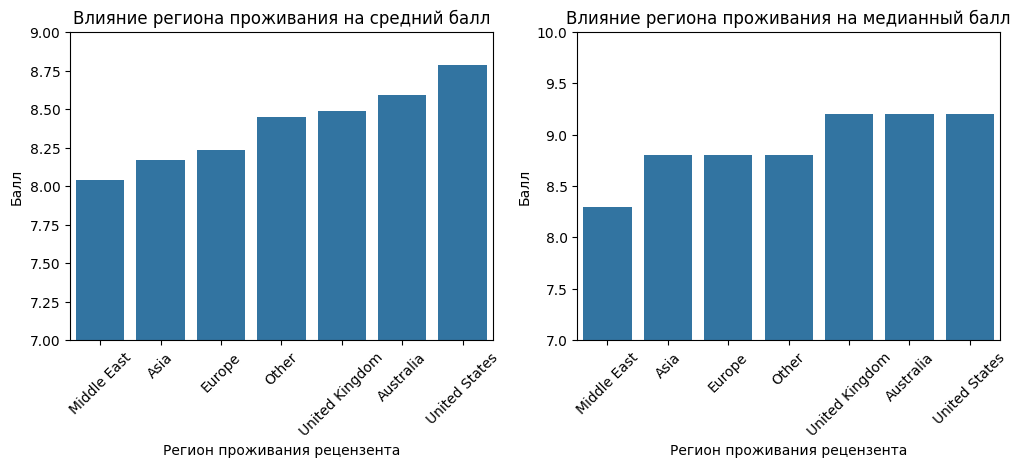

In [1696]:
data_region_mean = df.groupby('reviewer_geo_region')['reviewer_score'].mean().reset_index().sort_values('reviewer_score')
data_region_median = df.groupby('reviewer_geo_region')['reviewer_score'].median().reset_index().sort_values('reviewer_score')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# 1 график
barplot = sns.barplot(data=data_region_mean,
            x='reviewer_geo_region',
            y='reviewer_score', ax=axes[0])
barplot.set_ylim((7, 9));
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)
barplot.set_xlabel('Регион проживания рецензента')
barplot.set_ylabel('Балл')
barplot.set_title('Влияние региона проживания на средний балл');

# 2 график
barplot_1 = sns.barplot(data=data_region_median,
            x='reviewer_geo_region',
            y='reviewer_score', ax=axes[1])
barplot_1.set_ylim((7, 10));
barplot_1.set_xticklabels(barplot.get_xticklabels(), rotation=45)
barplot_1.set_xlabel('Регион проживания рецензента')
barplot_1.set_ylabel('Балл')
barplot_1.set_title('Влияние региона проживания на медианный балл');

Мы избавились от огромного количества стран, получив разбивку на основные регионы мира.
Визуализация подсказывает, что регион влияет на балл отеля.

**4. Признак lat и  lng**

Уникальных значений в данных признаках очень большое количество, к тому же в них присутствуют пропущенные значения.

In [1697]:
df['lat'].value_counts(True) * 100 # Без округления мы имеем около 1500 уникальных значений.

lat
51.501910    0.933252
51.511099    0.834125
51.500961    0.805245
51.499046    0.699353
51.510841    0.618959
               ...   
48.868780    0.001821
45.504526    0.001821
45.468495    0.001561
48.214507    0.001561
48.817808    0.001301
Name: proportion, Length: 1472, dtype: float64

In [1698]:
df['lat_round'] = df['lat'].round() # Округляем 
# Посмотрим на пропорцию страны отеля и широты
data_lat_group = df.groupby('hotels_country')['lat_round'].value_counts(True).reset_index() 

In [1699]:
# Заполним пропуски исходя из этой таблицы
max_prop = data_lat_group.loc[data_lat_group.groupby('hotels_country')['proportion'].idxmax()]
country_lat_dict = dict(zip(max_prop['hotels_country'], max_prop['lat_round'])) # Создаём словарь

df['lat_round'] = df['lat_round'].fillna(df['hotels_country'].map(country_lat_dict)) # Заполняем пропуски

Аналогично поступим и с долготой

In [1700]:
df['lng_round'] = df['lng'].round() # Округляем 
# Посмотрим на пропорцию страны отеля и широты
data_lng_group = df.groupby('hotels_country')['lng_round'].value_counts(True).reset_index() 
data_lng_group

,hotels_country,lng_round,proportion
0,Amsterdam Netherlands,5.0,1.0
1,Barcelona Spain,2.0,1.0
2,Milan Italy,9.0,1.0
3,Paris France,2.0,1.0
4,United Kingdom,-0.0,1.0
5,Vienna Austria,16.0,1.0


In [1701]:
max_prop = data_lng_group.loc[data_lng_group.groupby('hotels_country')['proportion'].idxmax()]
country_lng_dict = dict(zip(max_prop['hotels_country'], max_prop['lng_round'])) # Создаём словарь

df['lng_round'] = df['lng_round'].fillna(df['hotels_country'].map(country_lng_dict)) # Заполняем пропуски

In [1702]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                386803 non-null  int64         
 1   review_date                                 386803 non-null  datetime64[ns]
 2   average_score                               386803 non-null  float64       
 3   negative_review                             386803 non-null  object        
 4   review_total_negative_word_counts           386803 non-null  int64         
 5   total_number_of_reviews                     386803 non-null  int64         
 6   positive_review                             386803 non-null  object        
 7   review_total_positive_word_counts           386803 non-null  int64         
 8   total_number_of_reviews_reviewer_has_given  386803 non-null  int64        

In [1703]:
# Проверим корреляции старых признаков
print(f'Корреляция между признаками широта и оценка отелю : {df['lat'].corr(df['reviewer_score'], method='spearman')}')
print(f'Корреляция между признаками долгота и оценка отелю : {df['lng'].corr(df['reviewer_score'], method='spearman')}')
# Связи нет

Корреляция между признаками широта и оценка отелю : -0.028372013768897378
Корреляция между признаками долгота и оценка отелю : 0.06378506203878569


In [1704]:

df['lat_round'] = df['lat_round'].astype('int8') # Меняем тип данных, чтобы уменьшить объём таблицы
df['lng_round'] = df['lng_round'].astype('int8') # Меняем тип данных, чтобы уменьшить объём таблицы

In [1705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                386803 non-null  int64         
 1   review_date                                 386803 non-null  datetime64[ns]
 2   average_score                               386803 non-null  float64       
 3   negative_review                             386803 non-null  object        
 4   review_total_negative_word_counts           386803 non-null  int64         
 5   total_number_of_reviews                     386803 non-null  int64         
 6   positive_review                             386803 non-null  object        
 7   review_total_positive_word_counts           386803 non-null  int64         
 8   total_number_of_reviews_reviewer_has_given  386803 non-null  int64        

Посмотрим теперь визуально влияют ли данные признаки на оценку отеля.

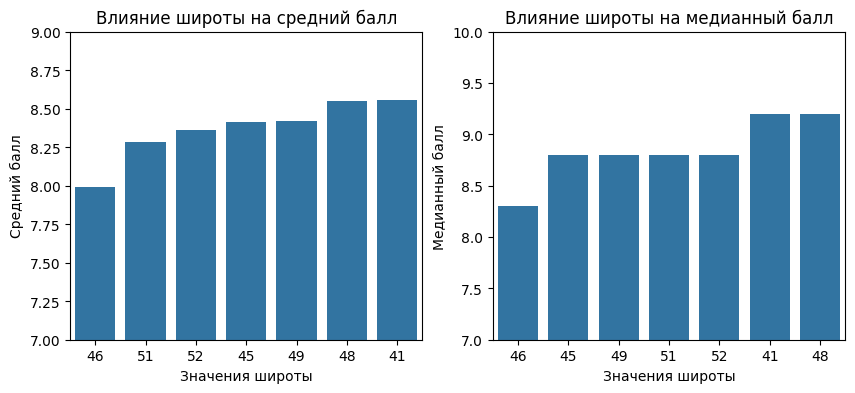

In [1706]:
# Готовим данные для широты
data_lat_group_mean = df.groupby('lat_round')['reviewer_score'].mean().reset_index() 
data_lat_group_mean_sorted = data_lat_group_mean.sort_values('reviewer_score')

data_lat_group_median = df.groupby('lat_round')['reviewer_score'].median().reset_index() 
data_lat_group_median_sorted = data_lat_group_median.sort_values('reviewer_score')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 1 график
barplot_mean = sns.barplot(data=data_lat_group_mean_sorted,
                           x='lat_round',
                           y='reviewer_score',
                           order=data_lat_group_mean_sorted['lat_round'],
                           ax = axes[0])
barplot_mean.set_ylim(7, 9)
barplot_mean.set_ylabel('Средний балл')
barplot_mean.set_xlabel('Значения широты')
barplot_mean.set_title('Влияние широты на средний балл')

# 2 график
barplot_median = sns.barplot(data=data_lat_group_median_sorted,
                           x='lat_round',
                           y='reviewer_score',
                           order=data_lat_group_median_sorted['lat_round'],
                           ax = axes[1])
barplot_median.set_ylim(7, 10)
barplot_median.set_ylabel('Медианный балл')
barplot_median.set_xlabel('Значения широты')
barplot_median.set_title('Влияние широты на медианный балл');

In [1707]:
print(f'Корреляция между признаками широта(округл.) и оценка отелю : {df['lat_round'].corr(df['reviewer_score'], method='spearman')}')
# Связи нет

Корреляция между признаками широта(округл.) и оценка отелю : -0.02695324359576556


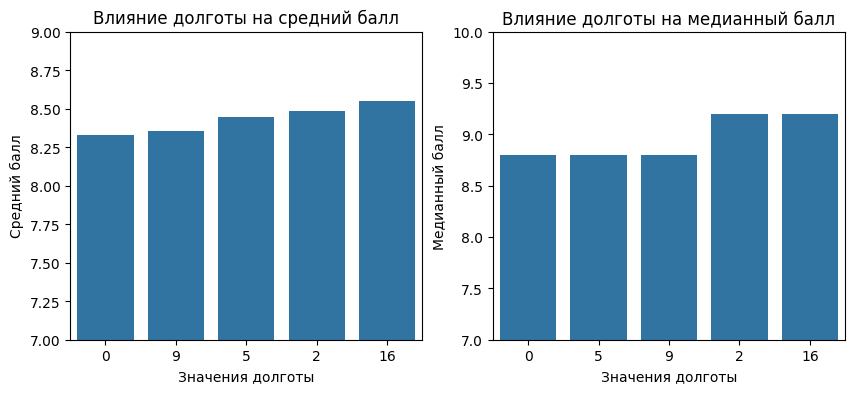

In [1708]:
# Готовим данные для долготы
data_lng_group_mean = df.groupby('lng_round')['reviewer_score'].mean().reset_index() 
data_lng_group_mean_sorted = data_lng_group_mean.sort_values('reviewer_score')

data_lng_group_median = df.groupby('lng_round')['reviewer_score'].median().reset_index() 
data_lng_group_median_sorted = data_lng_group_median.sort_values('reviewer_score')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 1 график
barplot_mean = sns.barplot(data=data_lng_group_mean_sorted,
                           x='lng_round',
                           y='reviewer_score',
                           order=data_lng_group_mean_sorted['lng_round'],
                           ax = axes[0])
barplot_mean.set_ylim(7, 9)
barplot_mean.set_ylabel('Средний балл')
barplot_mean.set_xlabel('Значения долготы')
barplot_mean.set_title('Влияние долготы на средний балл')

# 2 график
barplot_median = sns.barplot(data=data_lng_group_median_sorted,
                           x='lng_round',
                           y='reviewer_score',
                           order=data_lng_group_median_sorted['lng_round'],
                           ax = axes[1])
barplot_median.set_ylim(7, 10)
barplot_median.set_ylabel('Медианный балл')
barplot_median.set_xlabel('Значения долготы')
barplot_median.set_title('Влияние долготы на медианный балл');

In [1709]:
print(f'Корреляция между признаками долгота(округл.) и оценка отелю : {df['lng_round'].corr(df['reviewer_score'], method='spearman')}')

Корреляция между признаками долгота(округл.) и оценка отелю : 0.033989422118450484


In [1710]:
df.drop(['lat', 'lng'], axis=1, inplace=True)

Визуализация признаков подсказывает, что широта и долгота имеют влияние на целевой признак, поэтому их можно будет использовать для создания модели

**5. Признаки negative_review и positive_review**

In [1711]:
# Рассмотрим признак negative_review
print(f'Количество уникальных значений столбца negative_review: {df['negative_review'].nunique()}')

Количество уникальных значений столбца negative_review: 248828


In [1712]:
# Убираем пробелы, скрытые пропуски, меняем регистр
df['negative_review'] = df['negative_review'].str.strip()
df['negative_review'] = df['negative_review'].apply(lambda x: 'None' if not(x) else x)
df['negative_review'] = df['negative_review'].str.lower()

neg_rev = df['negative_review'].value_counts(True) * 100
neg_rev_filt = neg_rev[neg_rev > 0.05] # Рассмотрим только те значения, у которых доля больше 0.05%
neg_rev_filt


negative_review
no negative               24.794792
nothing                    4.105966
none                       0.444929
n a                        0.359873
nothing really             0.127714
small room                 0.109617
all good                   0.108582
breakfast                  0.102378
location                   0.101602
no complaints              0.099534
everything                 0.085315
nothing at all             0.085056
nothing to dislike         0.074457
price                      0.067218
nil                        0.066959
small rooms                0.059203
na                         0.052999
everything was perfect     0.052223
Name: proportion, dtype: float64

Изучив признак negative_review можно заметить, что многие рецензенты написали, что не видят ничего плохого в отеле, в котором они проживали. Однако одна и та же мысль у каждого написана по-разному (No Negative, Nothing, nothing, None и пр.), поэтому нам необходимо вычленить все отзывы, в которых рецензенты не написали ничего негативного, заменив эти значения на 0, негативные отзывы заменим на -1. 

In [1713]:
# В списке представлены основные (не все) неотрицательные отзывы, которые мы будем кодировать 0.
list_not_negative = ['no negative', 'nothing', 'n a', 'none', 'nothing really', 'all good', 'no complaints', 'nothing at all',
                'nothing to dislike', 'nil', 'na', 'everything was perfect', 'absolutely nothing', 'can t think of anything',
                'everything was great', 'nothing to complain about', 'no', 'everything was good', 'nothing all good', 'liked everything',
                'i liked everything', 'non', 'not much', 'nothing everything was perfect', 'everything was fine', 'all was good']  



df['negative_review_code'] = df['negative_review'].apply(lambda x: 0 if x in list_not_negative else -1)
df['negative_review_code'].value_counts(True)

negative_review_code
-1    0.691572
 0    0.308428
Name: proportion, dtype: float64

In [1714]:
# Аналогично поступим и с positive_review
print(f'Количество уникальных значений столбца positive_review: {df['positive_review'].nunique()}')

Количество уникальных значений столбца positive_review: 311737


In [1715]:
# Убираем пробелы, скрытые пропуски, меняем регистр
df['positive_review'] = df['positive_review'].str.strip()
df['positive_review'] = df['positive_review'].apply(lambda x: 'None' if not(x) else x)
df['positive_review'] = df['positive_review'].str.lower()

df['positive_review'].value_counts(True).head(30) * 100

positive_review
no positive                   6.950567
location                      2.286177
everything                    0.634173
nothing                       0.335313
great location                0.333762
the location                  0.306875
good location                 0.290329
breakfast                     0.152791
friendly staff                0.140899
excellent location            0.123060
staff                         0.108065
location and staff            0.088159
location staff                0.081437
location location location    0.066184
location was good             0.062823
location was great            0.062564
everything was perfect        0.062047
comfy bed                     0.058169
good breakfast                0.057394
perfect location              0.054808
the staff                     0.053774
location is great             0.052740
location is good              0.048604
clean                         0.046794
all                           0.046794
very frie

Признак positive_review имеет как положительные отзывы, так и нейтральные. Сохраним логику преобразования данных от negative_review. Отзывы положительные будем кодировать 1, а нейтральные или отрицательные - 0. Создадим список и напишем туда основные неположительные комментарии.

In [1716]:
list_not_positive = ['no positive', 'nothing', 'none'] # Нейтральных и негативных отзывов в данном столбце существенно меньше, чем в предыдущем.
df['positive_review_code'] = df['positive_review'].apply(lambda x: 0 if x in list_not_positive else 1)
df['positive_review_code'].value_counts(True).head()

positive_review_code
1    0.926733
0    0.073267
Name: proportion, dtype: float64

In [1717]:
df['negative_review_code'] = df['negative_review_code'].astype('int8') # Изменяем тип данных
df['positive_review_code'] = df['positive_review_code'].astype('int8')

In [1718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                386803 non-null  int64         
 1   review_date                                 386803 non-null  datetime64[ns]
 2   average_score                               386803 non-null  float64       
 3   negative_review                             386803 non-null  object        
 4   review_total_negative_word_counts           386803 non-null  int64         
 5   total_number_of_reviews                     386803 non-null  int64         
 6   positive_review                             386803 non-null  object        
 7   review_total_positive_word_counts           386803 non-null  int64         
 8   total_number_of_reviews_reviewer_has_given  386803 non-null  int64        

Посмотрим на влияние данных признаков на review_score

In [1719]:
data_negative_code_mean = df.groupby('negative_review_code')['reviewer_score'].mean().reset_index()
data_negative_code_mean

,negative_review_code,reviewer_score
0,-1,7.956459
1,0,9.384496


In [1720]:
data_negative_code_median = df.groupby('negative_review_code')['reviewer_score'].median().reset_index()
data_negative_code_median

,negative_review_code,reviewer_score
0,-1,8.3
1,0,9.6


In [1721]:
data_positive_code_mean = df.groupby('positive_review_code')['reviewer_score'].mean().reset_index()
data_positive_code_mean

,positive_review_code,reviewer_score
0,0,6.738514
1,1,8.528019


In [1722]:
data_positive_code_median = df.groupby('positive_review_code')['reviewer_score'].median().reset_index()
data_positive_code_median

,positive_review_code,reviewer_score
0,0,7.1
1,1,9.2


Влияние новых признаков очевидно есть

Создадим новые признаки: посчитаем количество слов в негативных и положительных отзывах

In [1723]:
df['negative_review_len'] = df['negative_review'].apply(lambda x: len(x.split())) # считаем количество слов
df['positive_review_len'] = df['positive_review'].apply(lambda x: len(x.split()))

In [1724]:
df[['negative_review_len', 'positive_review_len']].describe()

,negative_review_len,positive_review_len
count,386803.000000,386803.000000
mean,17.849295,16.465811
std,29.062291,21.383554
min,1.000000,1.000000
25%,2.000000,4.000000
50%,7.000000,10.000000
75%,22.000000,21.000000
max,406.000000,393.000000


In [1725]:
# Разделим каждую выборку нового признака на 5 частей по квантилям
df['negative_review_len_q'] = pd.qcut(df['negative_review_len'], q=5, labels=[1, 2, 3, 4, 5])
df['positive_review_len_q'] = pd.qcut(df['positive_review_len'], q=5, labels=[1, 2, 3, 4, 5])

In [1726]:
# Посмотрим на влияние новых признаков на reviewer_score
data_negative_len_q = df.groupby('negative_review_len_q')['reviewer_score'].mean().reset_index()
data_negative_len_q

,negative_review_len_q,reviewer_score
0,1,9.251567
1,2,8.517367
2,3,8.323138
3,4,8.048045
4,5,7.294464


In [1727]:
data_positive_len_q = df.groupby('positive_review_len_q')['reviewer_score'].mean().reset_index()
data_positive_len_q

,positive_review_len_q,reviewer_score
0,1,7.439030
1,2,8.299692
2,3,8.567955
3,4,8.778274
4,5,9.014458


In [1728]:
df['negative_review_code'] = df['negative_review_code'].astype('int8')
df['positive_review_code'] = df['positive_review_code'].astype('int8')

In [1729]:
# Удаляем ненужные столбцы
df.drop(['positive_review', 'negative_review'], axis=1, inplace=True) 

In [1730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                386803 non-null  int64         
 1   review_date                                 386803 non-null  datetime64[ns]
 2   average_score                               386803 non-null  float64       
 3   review_total_negative_word_counts           386803 non-null  int64         
 4   total_number_of_reviews                     386803 non-null  int64         
 5   review_total_positive_word_counts           386803 non-null  int64         
 6   total_number_of_reviews_reviewer_has_given  386803 non-null  int64         
 7   reviewer_score                              386803 non-null  float64       
 8   tags                                        386803 non-null  object       

После преобразований мы получилм 4 новых закодированных столбца positive_review_code и negative_review_code, positive_review_len_q и negative_review_len_q. Первичный анализпризнаков показывает, что они влияют на целевой признак.

**6. Рассмотрим признак tags**

Расскроем все списки и посчитаем количество самых употребляемых тегов. Выберем топ-20 и создадим из них список. Далее с помощью цикла посмотрим какое количество самых популярных тегов есть в отзыве. В итоге мы получим числовой столбец, который показывает количество наиболее популярных тегов в отзыве. 

Кроме того, создадим столбец, который считает количество тегов в каждом отзыве.

In [1731]:
import ast # Для преобразования списка в объект list

In [1732]:
df['tags'] = df['tags'].apply(ast.literal_eval)

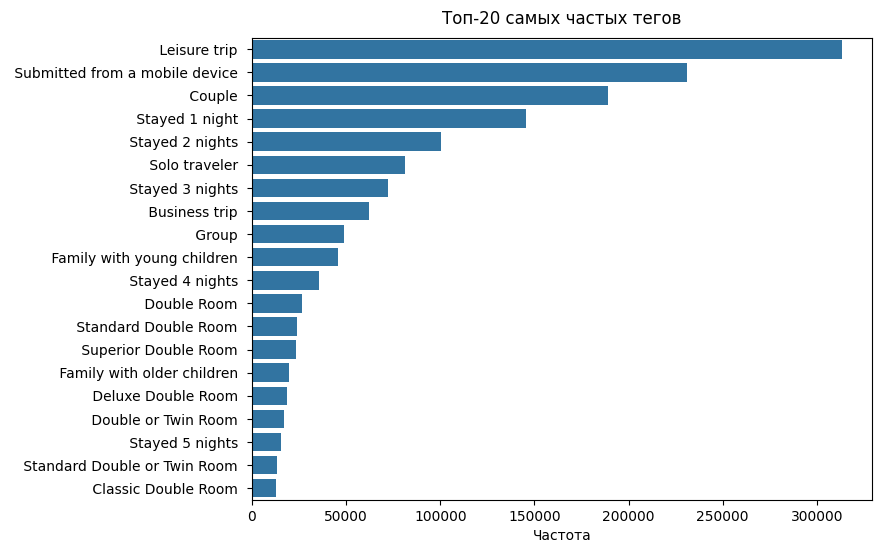

In [1733]:
# Посчитаем с помощью Counter самые популярные теги
from collections import Counter
all_tags = [tag for sublist in df['tags'] for tag in sublist]
tags_counts = Counter(all_tags)
top_20 = tags_counts.most_common(20)
tags, count = zip(*top_20)

plt.figure(figsize=(8, 6))
sns.barplot(x=count, y=tags)
plt.xlabel('Частота')
plt.title('Топ-20 самых частых тегов', pad=10);

In [1734]:
l = []
for i in df['tags']: # Получаем список
    count=0
    for tag in i: # Проходимся по элементам списка
        if tag in tags: # Если элемент есть в топе-20 самых популярных, то +1
            count += 1
    l.append(count)
    
df['count_most_pop_tags'] = l

In [1735]:
df['tags_len'] = df['tags'].apply(lambda x: len(x))

In [1736]:
df.drop('tags', axis=1, inplace=True)

In [1737]:
df

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,hotels_country,...,lat_round,lng_round,negative_review_code,positive_review_code,negative_review_len,positive_review_len,negative_review_len_q,positive_review_len_q,count_most_pop_tags,tags_len
0,581,2016-02-19,8.4,3,1994,4,7,10.0,531 day,United Kingdom,...,52,0,-1,1,1,3,1,1,4,5
1,299,2017-01-12,8.3,3,1361,2,14,6.3,203 day,United Kingdom,...,52,0,-1,1,2,1,1,1,4,4
2,32,2016-10-18,8.9,6,406,0,14,7.5,289 day,Paris France,...,49,2,-1,0,4,2,2,1,4,5
3,34,2015-09-22,7.5,0,607,11,8,10.0,681 day,Paris France,...,49,2,0,1,2,9,1,3,3,4
4,914,2016-03-05,8.5,4,7586,20,10,9.6,516 day,Amsterdam Netherlands,...,52,5,-1,1,2,18,1,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,107,2017-04-19,9.0,0,617,10,10,8.8,106 day,United Kingdom,...,51,0,0,1,2,8,1,3,4,5
386799,272,2017-02-13,8.4,0,3224,93,1,9.2,171 day,Vienna Austria,...,48,16,0,1,2,91,1,5,5,5
386800,457,2016-02-07,6.8,12,2751,9,21,8.3,543 day,United Kingdom,...,52,0,-1,1,10,8,3,3,3,4
386801,365,2017-05-21,8.1,0,1567,6,28,9.2,74 days,United Kingdom,...,52,0,0,1,2,5,1,2,4,4


In [1738]:
# Сделаем первичный анализ и посмотрим влияют ли новые признаки на reviewer_score
df['tags_len'].corr(df['count_most_pop_tags']) 

0.6915770468048281

Между новыми признаками наблюдается достаточно высокая корреляция, что негативно будет сказываться на модели регрессии, поэтому от одного признака лучше отказаться.
Внимательно рассмотрим информацию о каждом новом признаке.

In [1739]:
data_count_most_pop_tags = df.groupby('count_most_pop_tags')['reviewer_score'].median()
data_count_most_pop_tags

count_most_pop_tags
1    8.3
2    8.8
3    8.8
4    8.8
5    8.8
Name: reviewer_score, dtype: float64

In [1740]:
data_count_most_pop_tags_mean = df.groupby('count_most_pop_tags')['reviewer_score'].mean()
data_count_most_pop_tags_mean

count_most_pop_tags
1    7.800592
2    8.250594
3    8.363248
4    8.419560
5    8.402958
Name: reviewer_score, dtype: float64

Ярко выделяется только 1 категория, остальные практически идентичны 

In [1741]:
# Посмотрим сколько наблюдений 1 группе
df['count_most_pop_tags'].value_counts(True) * 100

count_most_pop_tags
4    50.705656
3    28.263224
5    19.029325
2     1.958103
1     0.043691
Name: proportion, dtype: float64

In [1742]:
df.drop('count_most_pop_tags', axis=1, inplace=True)

Количество наблюдений в 1 группе составляет всего 0.05%, что необычайно мало, остальные категории не дают явных отличий, это видно по средней и медиане даже без статистических тестов, поэтому удаляем данный признак, как неинформативный.

Рассмотрим tags_len

In [1743]:
data_tags_len = df.groupby('tags_len')['reviewer_score'].median()
data_tags_len

tags_len
1    2.5
2    5.8
3    8.8
4    8.8
5    8.8
6    9.2
Name: reviewer_score, dtype: float64

In [1744]:
data_tags_len_mean = df.groupby('tags_len')['reviewer_score'].mean()
data_tags_len_mean

tags_len
1    4.080000
2    6.253846
3    8.177630
4    8.360864
5    8.427228
6    8.407815
Name: reviewer_score, dtype: float64

In [1745]:
# Отличия в группах наблюдаются, рассмотрим доли
# Рассмотрим признак tags_len
df['tags_len'].value_counts(True) * 100

tags_len
5    57.769717
4    40.999941
3     1.066693
6     0.145552
2     0.016804
1     0.001293
Name: proportion, dtype: float64

Мы опять наблюдаем неприятную ситуацию, когда категория влияет на признак, однако количество данной категории в признаке экстремально мало.

In [1746]:
# Объединим группы 3, 6, 2, 1 в одну. И проведём статистический тест.
df['tags_len'] = df['tags_len'].apply(lambda x: 3 if x in [3, 6, 2 , 1] else x)
df['tags_len'].value_counts(True) * 100

tags_len
5    57.769717
4    40.999941
3     1.230342
Name: proportion, dtype: float64

In [1747]:
data_tags_len_mean = df.groupby('tags_len')['reviewer_score'].mean()
data_tags_len_mean

tags_len
3    8.174280
4    8.360864
5    8.427228
Name: reviewer_score, dtype: float64

In [1748]:
data_tags_len = df.groupby('tags_len')['reviewer_score'].median()
data_tags_len

tags_len
3    8.8
4    8.8
5    8.8
Name: reviewer_score, dtype: float64

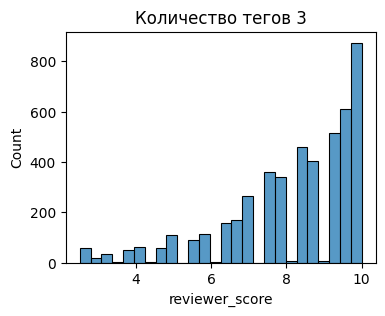

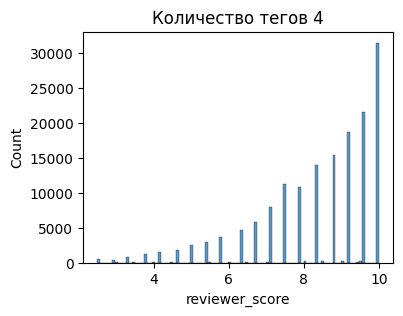

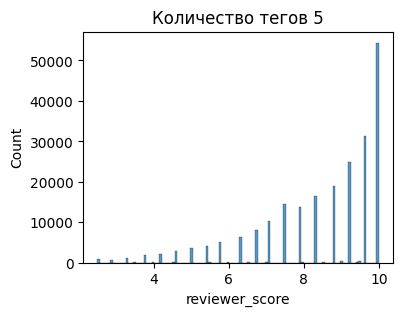

In [1749]:
lst_tags_len = [3, 4, 5]
for i in lst_tags_len:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[df['tags_len'] == i]['reviewer_score'])
    plt.title(f'Количество тегов {i}')

Распределения ненормальны, поэтому будем проводить тест Краскела-Уолиса

In [1750]:
alpha = 0.05 # Уровень доверительной вероятности

_, p = stats.kruskal(df[df['tags_len'] == 3]['reviewer_score'], df[df['tags_len'] == 4]['reviewer_score'], 
                     df[df['tags_len'] == 5]['reviewer_score'])

if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.')
else:
    print(f'P-value = {p:.3f}. Нет оснований отклонить нулевую гипотезу. Статистически значимых отличий между выборками нет.')

P-value = 0.000. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.


In [1751]:
df['tags_len'] = df['tags_len'].astype('int8')

Оставляем этот признак

In [1752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                386803 non-null  int64         
 1   review_date                                 386803 non-null  datetime64[ns]
 2   average_score                               386803 non-null  float64       
 3   review_total_negative_word_counts           386803 non-null  int64         
 4   total_number_of_reviews                     386803 non-null  int64         
 5   review_total_positive_word_counts           386803 non-null  int64         
 6   total_number_of_reviews_reviewer_has_given  386803 non-null  int64         
 7   reviewer_score                              386803 non-null  float64       
 8   days_since_review                           386803 non-null  object       

**7. Рассмотрим признак additional_number_of_scoring**

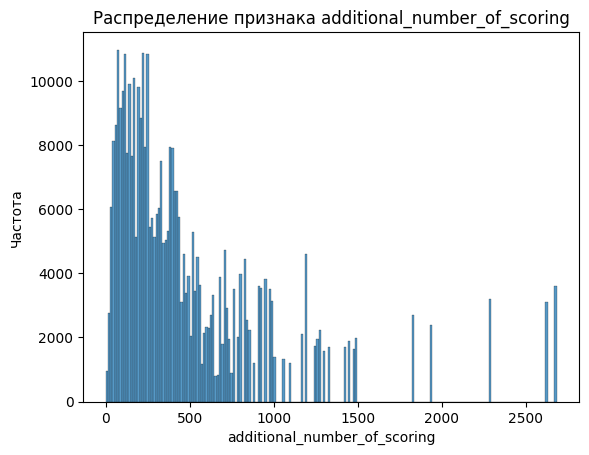

In [1753]:
plt.title('Распределение признака additional_number_of_scoring')
sns.histplot(df['additional_number_of_scoring'])
plt.ylabel('Частота');

In [1754]:
df['additional_number_of_scoring_q'] = pd.qcut(df['additional_number_of_scoring'], q=5, labels=[1, 2, 3, 4, 5])
data_add = df.groupby('additional_number_of_scoring_q')['reviewer_score'].mean().reset_index()
data_add

,additional_number_of_scoring_q,reviewer_score
0,1,8.528660
1,2,8.449768
2,3,8.369832
3,4,8.340150
4,5,8.294318


In [1755]:
df['additional_number_of_scoring_q'].value_counts(True) * 100

additional_number_of_scoring_q
2    20.294569
4    20.052585
1    20.032937
5    19.882472
3    19.737437
Name: proportion, dtype: float64

In [1756]:
df['additional_number_of_scoring'].corr(df['reviewer_score'])

-0.061772973001064546

Разбили данный столбец на 5 равных частей. Давайте проверем влияют ли новые категории на целевую переменную

In [1757]:
data_number_of_scoring = df.groupby('additional_number_of_scoring_q')['reviewer_score'].mean()
data_number_of_scoring

additional_number_of_scoring_q
1    8.528660
2    8.449768
3    8.369832
4    8.340150
5    8.294318
Name: reviewer_score, dtype: float64

**8. Рассмотрим признаки review_date и days_since_review**

In [1758]:
df['review_date'].value_counts(True) * 100

review_date
2017-08-02    0.494050
2016-09-15    0.449324
2017-04-05    0.440017
2016-08-30    0.377970
2016-02-16    0.375126
                ...   
2017-04-03    0.039814
2016-12-03    0.039814
2015-11-27    0.037745
2017-04-01    0.032833
2017-04-02    0.028697
Name: proportion, Length: 731, dtype: float64

Выделяющихся дат не обнаружено, давайте создадим несколько новых столбцов с годом, месяцем, днём недели, числом.

In [1759]:
df['review_date_year'] = df['review_date'].dt.year
df['review_date_month'] = df['review_date'].dt.month
df['review_date_days_of_week'] = df['review_date'].dt.day_of_week
df['review_date_days'] = df['review_date'].dt.day

In [1760]:
data_year = df.groupby('review_date_year')['reviewer_score'].mean()
data_year 

review_date_year
2015    8.323993
2016    8.424856
2017    8.393787
Name: reviewer_score, dtype: float64

In [1761]:
df['review_date_year'].corr(df['reviewer_score'])
# Связи нет

0.01104271637223822

In [1762]:
data_month = df.groupby('review_date_month')['reviewer_score'].mean()
data_month

review_date_month
1     8.482245
2     8.534773
3     8.481505
4     8.432322
5     8.385711
6     8.387010
7     8.339102
8     8.412986
9     8.293349
10    8.262119
11    8.343183
12    8.431444
Name: reviewer_score, dtype: float64

In [1763]:
df['review_date_month'].corr(df['reviewer_score'])
# Связи нет

-0.032397437952564806

In [1764]:
data_days_of_week = df.groupby('review_date_days_of_week')['reviewer_score'].mean()
data_days_of_week

review_date_days_of_week
0    8.394442
1    8.444557
2    8.408968
3    8.347063
4    8.370422
5    8.370156
6    8.396875
Name: reviewer_score, dtype: float64

In [1765]:
df['review_date_days_of_week'].corr(df['reviewer_score'])
# Связи нет

-0.008885929394076543

In [1766]:
data_days = df.groupby('review_date_days')['reviewer_score'].mean()
data_days

review_date_days
1     8.378933
2     8.410173
3     8.376258
4     8.362608
5     8.394852
6     8.386251
7     8.402450
8     8.404321
9     8.431152
10    8.374962
11    8.377390
12    8.390510
13    8.382556
14    8.416895
15    8.400845
16    8.397779
17    8.413709
18    8.395672
19    8.407542
20    8.388499
21    8.411986
22    8.396660
23    8.417633
24    8.394887
25    8.426570
26    8.408216
27    8.427599
28    8.382724
29    8.382323
30    8.364726
31    8.394056
Name: reviewer_score, dtype: float64

In [1767]:
df['review_date_days'].corr(df['reviewer_score'])
# Связи нет

0.0021393707769770897

In [1768]:
df

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,hotels_country,...,negative_review_len,positive_review_len,negative_review_len_q,positive_review_len_q,tags_len,additional_number_of_scoring_q,review_date_year,review_date_month,review_date_days_of_week,review_date_days
0,581,2016-02-19,8.4,3,1994,4,7,10.0,531 day,United Kingdom,...,1,3,1,1,5,4,2016,2,4,19
1,299,2017-01-12,8.3,3,1361,2,14,6.3,203 day,United Kingdom,...,2,1,1,1,4,3,2017,1,3,12
2,32,2016-10-18,8.9,6,406,0,14,7.5,289 day,Paris France,...,4,2,2,1,5,1,2016,10,1,18
3,34,2015-09-22,7.5,0,607,11,8,10.0,681 day,Paris France,...,2,9,1,3,4,1,2015,9,1,22
4,914,2016-03-05,8.5,4,7586,20,10,9.6,516 day,Amsterdam Netherlands,...,2,18,1,4,4,5,2016,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,107,2017-04-19,9.0,0,617,10,10,8.8,106 day,United Kingdom,...,2,8,1,3,5,1,2017,4,2,19
386799,272,2017-02-13,8.4,0,3224,93,1,9.2,171 day,Vienna Austria,...,2,91,1,5,5,3,2017,2,0,13
386800,457,2016-02-07,6.8,12,2751,9,21,8.3,543 day,United Kingdom,...,10,8,3,3,4,4,2016,2,6,7
386801,365,2017-05-21,8.1,0,1567,6,28,9.2,74 days,United Kingdom,...,2,5,1,2,4,3,2017,5,6,21


In [1769]:
# Попробуем создать ещё 1 признак новый признак, напротив каждой даты напишем ранг и проверим корреляцию. 
# У самой далекой даты будет ранг 1, каждпя следующая на 1 больше
df['review_date_rank'] = df['review_date'].rank(method='dense')
df['review_date_rank'].corr(df['reviewer_score'])
# Связи нет

-0.002408163742145626

Рассмотрим признак days_since_review

In [1770]:
df['days_since_review'].value_counts(True) * 100

days_since_review
1 days     0.494050
322 day    0.449324
120 day    0.440017
338 day    0.377970
534 day    0.375126
             ...   
122 day    0.039814
243 day    0.039814
615 day    0.037745
124 day    0.032833
123 day    0.028697
Name: proportion, Length: 731, dtype: float64

In [1771]:
df['days_since_review'] = df['days_since_review'].apply(lambda x: int(x.split()[0])) # Преобразуем столбец
df.head()

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,hotels_country,...,positive_review_len,negative_review_len_q,positive_review_len_q,tags_len,additional_number_of_scoring_q,review_date_year,review_date_month,review_date_days_of_week,review_date_days,review_date_rank
0,581,2016-02-19,8.4,3,1994,4,7,10.0,531,United Kingdom,...,3,1,1,5,4,2016,2,4,19,200.0
1,299,2017-01-12,8.3,3,1361,2,14,6.3,203,United Kingdom,...,1,1,1,4,3,2017,1,3,12,528.0
2,32,2016-10-18,8.9,6,406,0,14,7.5,289,Paris France,...,2,2,1,5,1,2016,10,1,18,442.0
3,34,2015-09-22,7.5,0,607,11,8,10.0,681,Paris France,...,9,1,3,4,1,2015,9,1,22,50.0
4,914,2016-03-05,8.5,4,7586,20,10,9.6,516,Amsterdam Netherlands,...,18,1,4,4,5,2016,3,5,5,215.0


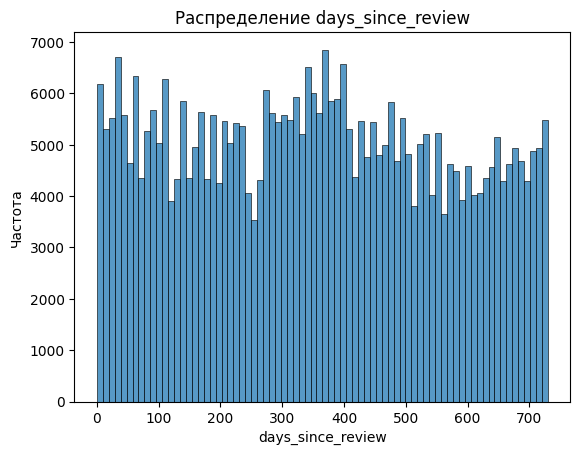

In [1772]:
plt.title('Распределение days_since_review')
sns.histplot(df['days_since_review'])
plt.ylabel('Частота');

In [1773]:
df['days_since_review'].corr(df['reviewer_score']) 
# Связи нет

0.002408163742145626

In [1774]:
df['days_since_review_q'] = pd.qcut(df['days_since_review'], q = 5, labels=[1, 2, 3, 4, 5])
df['days_since_review_q'].corr(df['reviewer_score']) 

0.0036364695025087575

In [1775]:
df.drop('review_date', axis=1, inplace=True)

In [1776]:
df.duplicated().sum() # Проверим дубликаты

348

In [1777]:
df.drop_duplicates(inplace=True)

## Выводы ##
1) Мы преобразовали практически все строковые столбцы в числовые, где-то вычленив определенную, наиболее важную информацию, где-то объедив наблюдения в логические группы
2) Проверили и удалили дубликаты
3) Теперь наша основная задача - это отобрать нужные переменные для модели
4) Нам необходимо закодировать несколько столбцов, которые имеют тип данных данных - object.

# 2. Кодирование, нормализация и отбор признаков для модели

In [1778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386455 entries, 0 to 386802
Data columns (total 26 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   additional_number_of_scoring                386455 non-null  int64   
 1   average_score                               386455 non-null  float64 
 2   review_total_negative_word_counts           386455 non-null  int64   
 3   total_number_of_reviews                     386455 non-null  int64   
 4   review_total_positive_word_counts           386455 non-null  int64   
 5   total_number_of_reviews_reviewer_has_given  386455 non-null  int64   
 6   reviewer_score                              386455 non-null  float64 
 7   days_since_review                           386455 non-null  int64   
 8   hotels_country                              386455 non-null  object  
 9   reviewer_geo_region                         386455 non-null  obj

**1. Рассмотрим ещё раз признаки hotels_country и reviewer_geo_region. Проверим статистически значимы ли у них группы. После проверки выберем тип кодировки**

In [1779]:
groups_country = [df[df['hotels_country'] == i]['reviewer_score'] for i in df['hotels_country'].unique()]
print(len(groups_country))

6


In [1780]:
_, p = stats.kruskal(*groups_country)

if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.')
else:
    print(f'P-value = {p:.3f}. Нет оснований отклонить нулевую гипотезу. Статистически значимых отличий между выборками нет.')

P-value = 0.000. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.


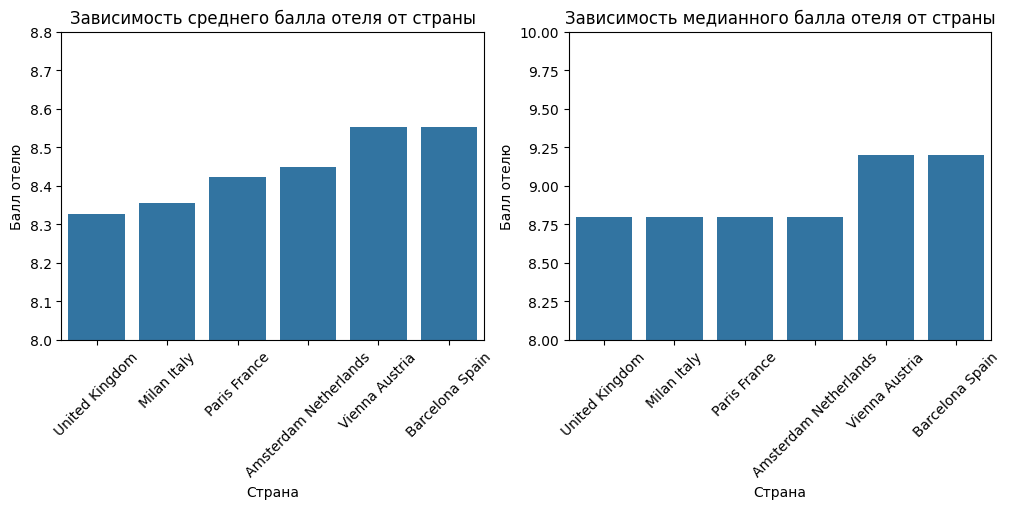

In [1781]:
# Посмотрим на график  среднего и медианного значения оценки отеля в зависимости от страны
country_data_median = df.groupby('hotels_country')['reviewer_score'].median()
country_data_mean = df.groupby('hotels_country')['reviewer_score'].mean()
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 1 график
barplot_mean = sns.barplot(country_data_mean.sort_values(), ax=axes[0])
barplot_mean.set_title('Зависимость среднего балла отеля от страны')
barplot_mean.set_xticklabels(barplot_mean.get_xticklabels(), rotation=45)
barplot_mean.set_xlabel('Страна')
barplot_mean.set_ylabel('Балл отелю');
barplot_mean.set_ylim(8, 8.8)

# 2 график
barplot_median = sns.barplot(country_data_median.sort_values(), ax=axes[1])
barplot_median.set_title('Зависимость медианного балла отеля от страны')
barplot_median.set_xticklabels(barplot_mean.get_xticklabels(), rotation=45)
barplot_median.set_xlabel('Страна')
barplot_median.set_ylabel('Балл отелю')
barplot_median.set_ylim(8, 10);

In [1782]:
dict_countries_code = {'United Kingdom' : 1, 'Milan Italy' : 2, 'Paris France' : 3, 
                       'Amsterdam Netherlands' : 4, 'Vienna Austria' : 5, 'Barcelona Spain' : 6}
df['hotels_country'] = df['hotels_country'].map(dict_countries_code) # Сделали кодировку

Аналогично поступим со столбцом reviewer_geo_region

In [1783]:
groups_geo = [df[df['reviewer_geo_region'] == i]['reviewer_score'] for i in df['reviewer_geo_region'].unique()]
print(len(groups_geo))

7


In [1784]:
_, p = stats.kruskal(*groups_geo)

if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.')
else:
    print(f'P-value = {p:.3f}. Нет оснований отклонить нулевую гипотезу. Статистически значимых отличий между выборками нет.')

P-value = 0.000. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.


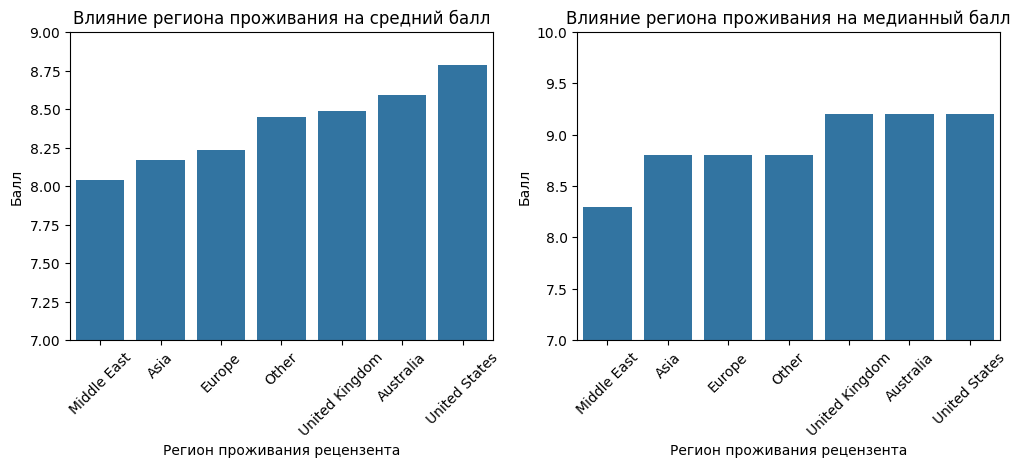

In [1785]:
data_region_mean = df.groupby('reviewer_geo_region')['reviewer_score'].mean().reset_index().sort_values('reviewer_score')
data_region_median = df.groupby('reviewer_geo_region')['reviewer_score'].median().reset_index().sort_values('reviewer_score')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# 1 график
barplot = sns.barplot(data=data_region_mean,
            x='reviewer_geo_region',
            y='reviewer_score', ax=axes[0])
barplot.set_ylim((7, 9));
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)
barplot.set_xlabel('Регион проживания рецензента')
barplot.set_ylabel('Балл')
barplot.set_title('Влияние региона проживания на средний балл');

# 2 график
barplot_1 = sns.barplot(data=data_region_median,
            x='reviewer_geo_region',
            y='reviewer_score', ax=axes[1])
barplot_1.set_ylim((7, 10));
barplot_1.set_xticklabels(barplot.get_xticklabels(), rotation=45)
barplot_1.set_xlabel('Регион проживания рецензента')
barplot_1.set_ylabel('Балл')
barplot_1.set_title('Влияние региона проживания на медианный балл');

In [1786]:
df['reviewer_geo_region'].unique()

array(['United Kingdom', 'Asia', 'Europe', 'Middle East', 'Other',
       'United States', 'Australia'], dtype=object)

In [1787]:
dict_geo = {'Middle East' : 1, 'Asia' : 2, 'Europe' : 3, 'Other' : 4, 'United Kingdom' : 5, 'Australia' : 6, 'United States' : 7}
df['reviewer_geo_region'] = df['reviewer_geo_region'].map(dict_geo)

In [1788]:
df['reviewer_geo_region'] = df['reviewer_geo_region'].astype('int8') # поменяли тип данных
df['hotels_country'] = df['hotels_country'].astype('int8')

Мы получили 2 значимых признака.

Продолжим отбирать признаки. Рассмотрим additional_number_of_scoring and average_score. Посмотрим на графики рассеивания.

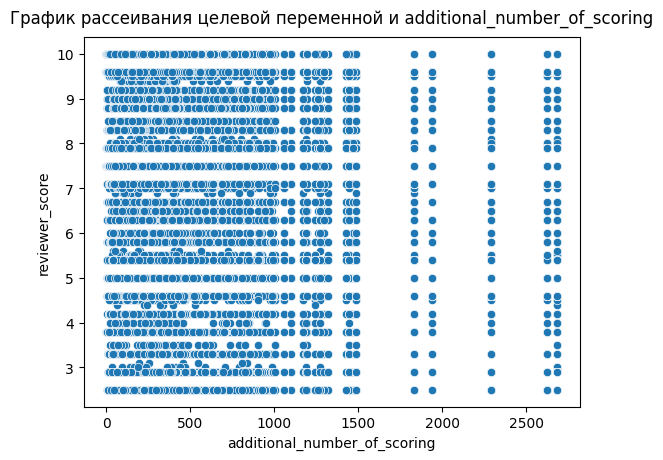

In [1789]:
scatterplot_add = sns.scatterplot(data=df,
                                  x='additional_number_of_scoring',
                                  y='reviewer_score')
scatterplot_add.set_title('График рассеивания целевой переменной и additional_number_of_scoring', pad=10);

In [1790]:
print(f'Корреляция между additional_number_of_scoring и reviewer_score: {df['additional_number_of_scoring'].corr(df['reviewer_score'], method='spearman')}')

Корреляция между additional_number_of_scoring и reviewer_score: -0.04958953191979091


In [1791]:
# Удаляем признак
df.drop('additional_number_of_scoring', axis=1, inplace=True)

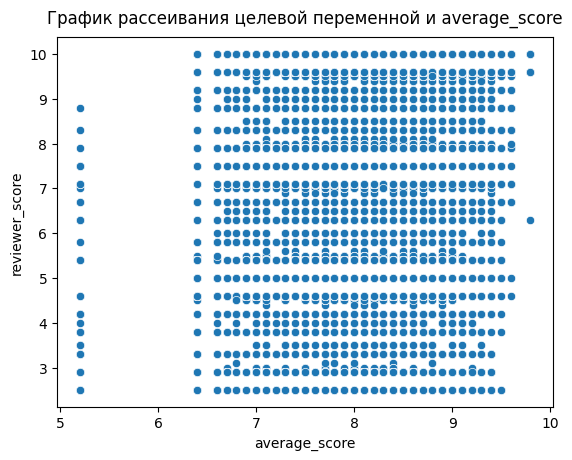

In [1792]:
scatterplot_add = sns.scatterplot(data=df,
                                  x='average_score',
                                  y='reviewer_score')
scatterplot_add.set_title('График рассеивания целевой переменной и average_score', pad=10);

In [1793]:
print(f'Корреляция между average_score и reviewer_score: {df['average_score'].corr(df['reviewer_score'])}')
# Связь есть, хоть и слабая, оставляем признак

Корреляция между average_score и reviewer_score: 0.3637969722275112


Рассмотрим следующие 3 признака total_number_of_reviews, review_total_positive_word_counts, total_number_of_reviews_reviewer_has_give

Рассмотрим сперва их распределения и если потребуется поработаем с с выбросами

<Axes: xlabel='total_number_of_reviews', ylabel='Count'>

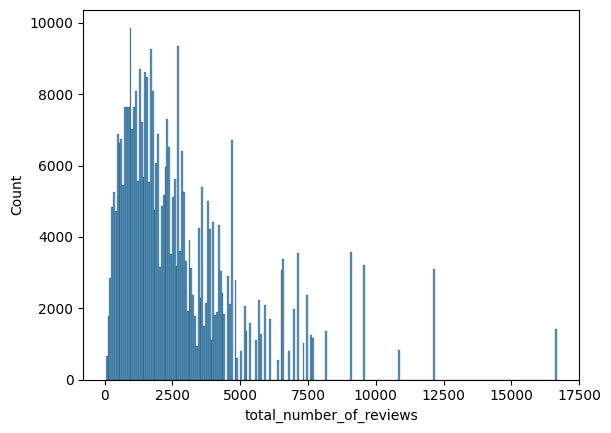

In [1794]:
sns.histplot(df['total_number_of_reviews'])

<Axes: xlabel='review_total_positive_word_counts', ylabel='Count'>

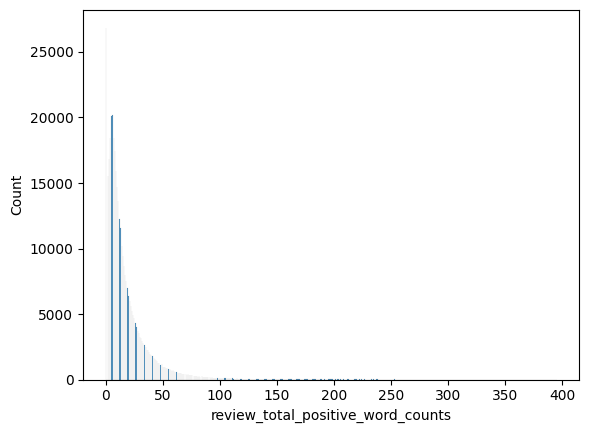

In [1798]:
sns.histplot(df['review_total_positive_word_counts'])

In [1802]:
df[df['review_total_positive_word_counts'] > 150]

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,hotels_country,reviewer_geo_region,lat_round,...,negative_review_len_q,positive_review_len_q,tags_len,additional_number_of_scoring_q,review_date_year,review_date_month,review_date_days_of_week,review_date_days,review_date_rank,days_since_review_q
94,9.3,36,720,216,6,10.0,29,4,6,52,...,5,5,3,1,2017,7,2,5,702.0,1
221,8.1,87,1442,182,21,7.9,325,3,3,49,...,5,5,4,2,2016,9,0,12,406.0,3
439,8.8,20,1489,201,1,9.6,216,1,5,51,...,4,5,4,3,2016,12,4,30,515.0,2
530,8.6,200,641,158,15,8.3,136,6,3,41,...,5,5,4,1,2017,3,0,20,595.0,1
582,8.6,111,527,227,18,9.6,61,1,6,52,...,5,5,4,1,2017,6,5,3,670.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385516,8.6,0,3636,186,5,9.6,55,2,5,45,...,1,5,4,2,2017,6,4,9,676.0,1
385517,8.8,0,2220,186,3,10.0,197,6,3,41,...,1,5,4,2,2017,1,2,18,534.0,2
385635,9.0,94,2750,215,2,9.2,44,1,4,52,...,5,5,4,4,2017,6,1,20,687.0,1
386181,8.8,56,1327,184,2,10.0,672,3,4,49,...,5,5,5,1,2015,10,3,1,59.0,5


In [1797]:
df[df['total_number_of_reviews']>13000]

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,hotels_country,reviewer_geo_region,lat_round,...,negative_review_len_q,positive_review_len_q,tags_len,additional_number_of_scoring_q,review_date_year,review_date_month,review_date_days_of_week,review_date_days,review_date_rank,days_since_review_q
653,8.1,0,16670,39,2,10.0,297,2,7,46,...,1,5,5,5,2016,10,0,10,434.0,3
1007,8.1,99,16670,14,1,6.3,695,2,4,46,...,5,3,5,5,2015,9,1,8,36.0,5
1213,8.1,15,16670,7,43,8.3,337,2,3,46,...,4,2,4,5,2016,8,2,31,394.0,3
1383,8.1,24,16670,28,3,8.3,553,2,3,46,...,4,5,4,5,2016,1,3,28,178.0,4
1870,8.1,7,16670,6,5,7.1,301,2,3,46,...,3,2,4,5,2016,10,3,6,430.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385321,8.1,4,16670,7,3,7.1,448,2,3,46,...,1,2,5,5,2016,5,3,12,283.0,4
386140,8.1,31,16670,55,15,8.8,550,2,1,46,...,5,5,4,5,2016,1,6,31,181.0,4
386535,8.1,85,16670,19,4,4.5,413,2,5,46,...,5,4,5,5,2016,6,3,16,318.0,3
386635,8.1,19,16670,0,2,5.4,148,2,3,46,...,4,1,5,5,2017,3,2,8,583.0,2


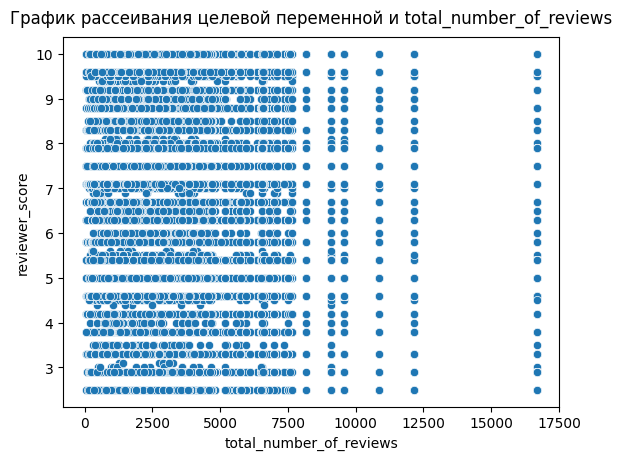

In [1659]:
scatterplot_add = sns.scatterplot(data=df,
                                  x='total_number_of_reviews',
                                  y='reviewer_score')
scatterplot_add.set_title('График рассеивания целевой переменной и total_number_of_reviews', pad=10);

In [ ]:
print(f'Корреляция между total_number_of_reviews и reviewer_score: {df['total_number_of_reviews'].corr(df['reviewer_score'], method='spearman')}')
# Связи практически никакой нет, удаляем этот признак

Корреляция между total_number_of_reviews и reviewer_score: -0.07641258577316501


In [1666]:
df.drop('total_number_of_reviews', axis=1, inplace=True)

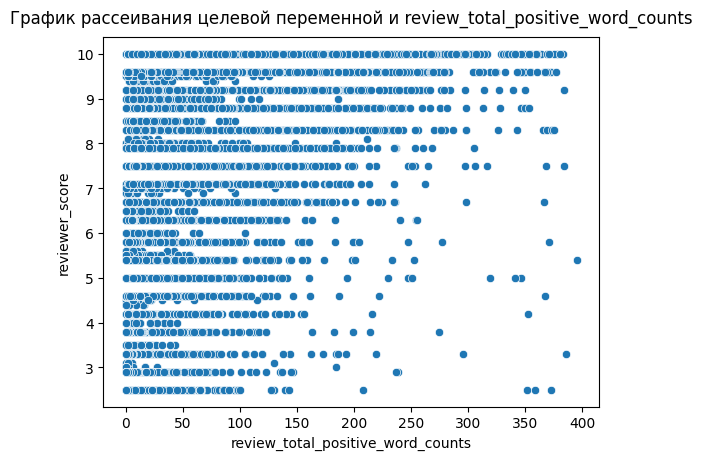

In [1664]:
scatterplot_add = sns.scatterplot(data=df,
                                  x='review_total_positive_word_counts',
                                  y='reviewer_score')
scatterplot_add.set_title('График рассеивания целевой переменной и review_total_positive_word_counts', pad=10);

In [ ]:
print(f'Корреляция между review_total_positive_word_counts и reviewer_score: {df['review_total_positive_word_counts'].corr(df['reviewer_score'], method='spearman')}')
# Связь есть, оставляем признак

Корреляция между review_total_positive_word_counts и reviewer_score: 0.31132615397938107


In [1668]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386455 entries, 0 to 386802
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   average_score                               386455 non-null  float64 
 1   review_total_negative_word_counts           386455 non-null  int64   
 2   review_total_positive_word_counts           386455 non-null  int64   
 3   total_number_of_reviews_reviewer_has_given  386455 non-null  int64   
 4   reviewer_score                              386455 non-null  float64 
 5   days_since_review                           386455 non-null  int64   
 6   hotels_country                              386455 non-null  int8    
 7   reviewer_geo_region                         386455 non-null  int8    
 8   lat_round                                   386455 non-null  int8    
 9   lng_round                                   386455 non-null  int

In [1673]:
scatterplot_add = sns.scatterplot(data=df,
                                  x='total_number_of_reviews_reviewer_has_give',
                                  y='reviewer_score')
scatterplot_add.set_title('График рассеивания целевой переменной и total_number_of_reviews_reviewer_has_give', pad=10);

ValueError: Could not interpret value `total_number_of_reviews_reviewer_has_give` for `x`. An entry with this name does not appear in `data`.

<Axes: >

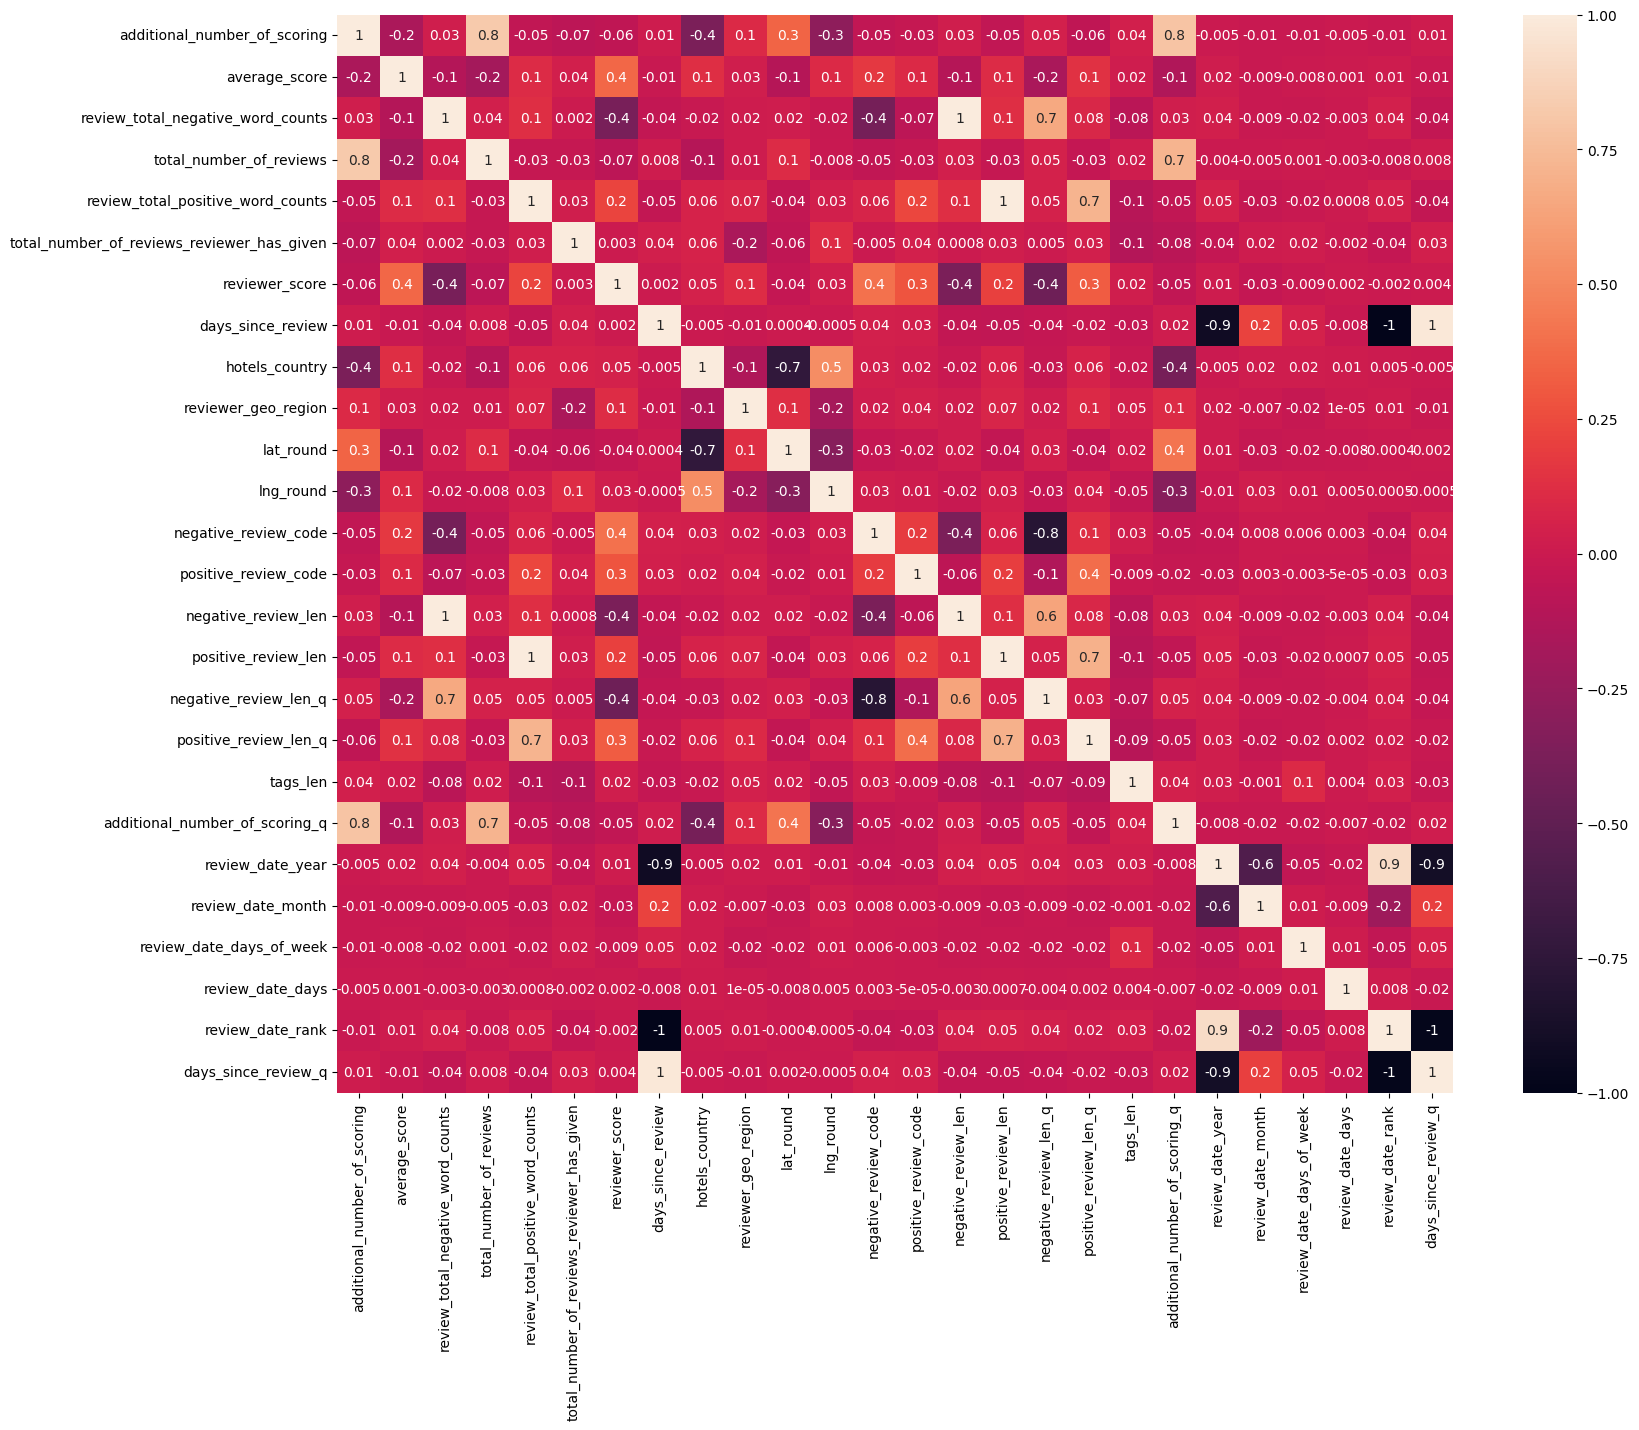

In [1642]:
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(), annot=True, fmt='.1g')


In [ ]:
# object_columns = [s for s in df.columns if df[s].dtypes == 'object']
# df.drop(object_columns, axis = 1, inplace=True)


In [1662]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386455 entries, 0 to 386802
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   average_score                               386455 non-null  float64 
 1   review_total_negative_word_counts           386455 non-null  int64   
 2   total_number_of_reviews                     386455 non-null  int64   
 3   review_total_positive_word_counts           386455 non-null  int64   
 4   total_number_of_reviews_reviewer_has_given  386455 non-null  int64   
 5   reviewer_score                              386455 non-null  float64 
 6   days_since_review                           386455 non-null  int64   
 7   hotels_country                              386455 non-null  int8    
 8   reviewer_geo_region                         386455 non-null  int8    
 9   lat_round                                   386455 non-null  int

In [1663]:
object_columns = [s for s in df.columns if df[s].dtypes == 'object']
df.drop(object_columns, axis = 1, inplace=True)

    # Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
    # Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = df[['average_score', 'review_total_negative_word_counts', 'review_total_positive_word_counts', 'negative_review_code', 'positive_review_code']]  
y = df['reviewer_score']  
      
    # Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
    # Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
    # Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
    # Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
    # Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
    # Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
    # Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13883546151430295


In [ ]:
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
    # Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))